### Script to Parse Methylation FASTA File and to Produce a Graph 
#### The graph will display the methylation score dynamics over both strands of GRBV genome

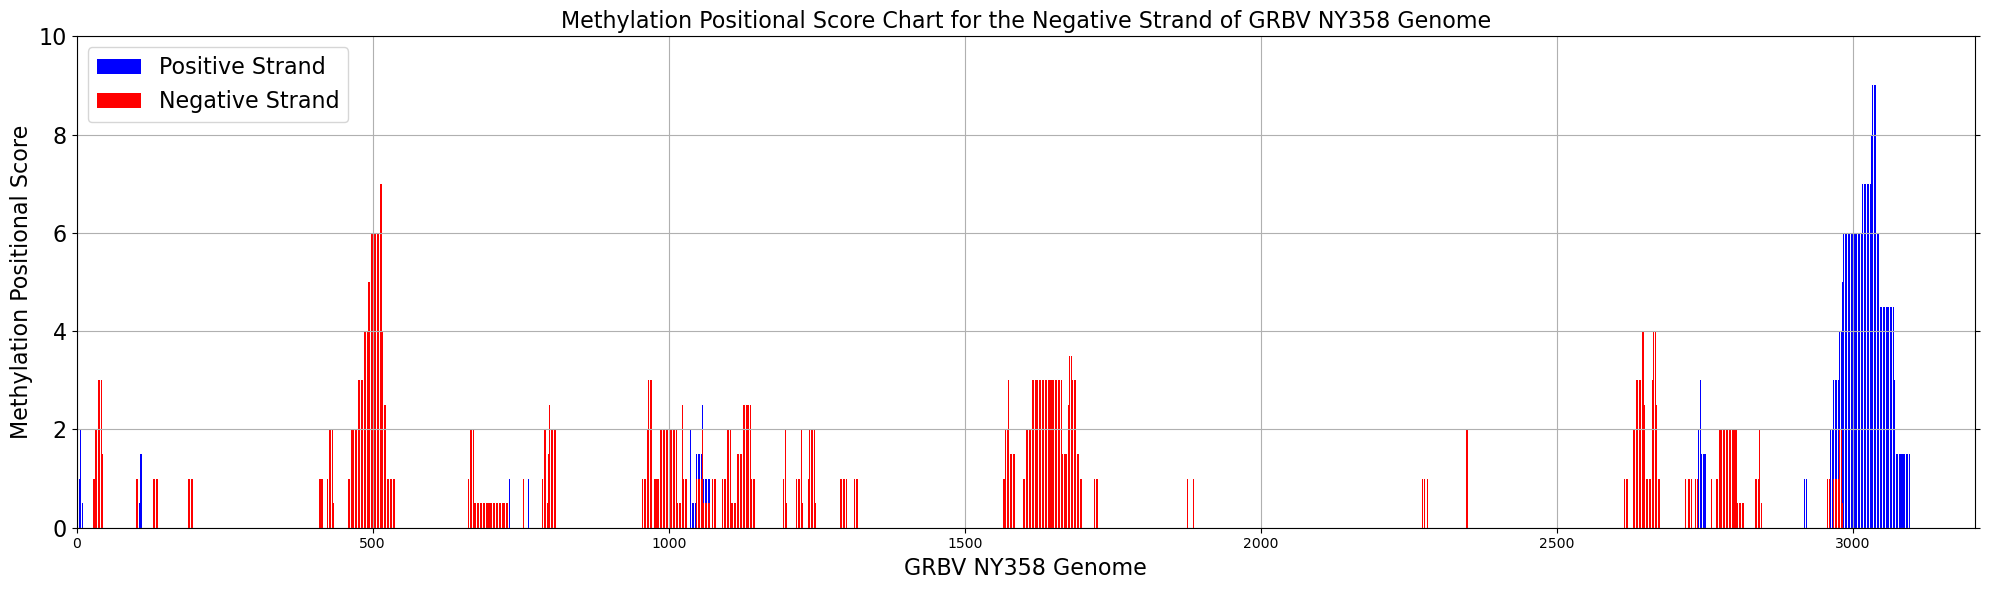

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def parse_fasta(file_path):
    sequences = {}
    with open(file_path, 'r') as file:
        current_sequence = ''
        current_header = ''
        for line in file:
            if line.startswith('>'):
                if current_sequence:
                    sequences[current_header] = current_sequence
                    current_sequence = ''
                current_header = line.strip()[1:]
            else:
                current_sequence += line.strip()
        if current_sequence:
            sequences[current_header] = current_sequence
    return sequences

def calculate_score(sequence):
    scores = []
    min_score = 0
    score = min_score
    for base in sequence:
        if base == 'M':
            score += 1
        elif base == 'C':
            score -= 1.5
            # Ensure score doesn't go below min_score
            score = max(score, min_score)
        scores.append(score)
    return scores


def plot_scores(scores1, scores2, figsize=(20, 6), fontsize=16, color1='blue', color2='red'):
    fig, ax = plt.subplots(figsize=figsize)

    # Assuming the length of the genome is the same for both sequences
    genome_length = len(scores1)

    x = np.arange(genome_length)  # x-axis values
    
    ax.bar(x, scores1, color=color1, width=0.7, align='center', label='Positive Strand')
    ax.bar(x, scores2, color=color2, width=0.7, align='center', label='Negative Strand')

    ax.set_xlabel('GRBV NY358 Genome', fontsize=fontsize)
    ax.set_ylabel('Methylation Positional Score', fontsize=fontsize)
    ax.set_title('Methylation Positional Score Chart for the Negative Strand of GRBV NY358 Genome', fontsize=fontsize)
    ax.grid(True)
    ax.legend(loc='upper left', fontsize=fontsize)

    # Setting ticks on both sides of y-axis
    ax.yaxis.set_ticks_position('both')
    ax.tick_params(axis='y', labelsize=fontsize)

    # Setting y-axis limit symmetrically around zero
    max_value = max(max(scores1)+1, max(scores2))
    min_value = min(min(scores1), min(scores2))
    ax.set_ylim(min_value, max_value)

    # Setting x-axis limit to cover the whole genome length
    ax.set_xlim(0, genome_length)

    plt.tight_layout()
    plt.savefig("scores_comparison_bar.pdf")  # Save as PDF
    plt.savefig("scores_comparison_bar.png")  # Save as PNG
    plt.show()


if __name__ == '__main__':
    fasta_file1 = "24dpi_GRBV_M.fasta"  # Replace with the path to your first fasta file
    fasta_file2 = "24dpi_GRBV_M_Neg.fasta"  # Replace with the path to your second fasta file
    sequences1 = parse_fasta(fasta_file1)
    sequences2 = parse_fasta(fasta_file2)
    sequence1 = list(sequences1.values())[0]  # Assuming there's only one sequence in each file
    sequence2 = list(sequences2.values())[0]
    scores1 = calculate_score(sequence1)
    scores2 = calculate_score(sequence2)
    plot_scores(scores1, scores2)
